In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [3]:
df = pd.read_csv("../data/BrentOilPrices.csv")

In [5]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.sort_values("Date").reset_index(drop=True)
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_23252\634479822.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


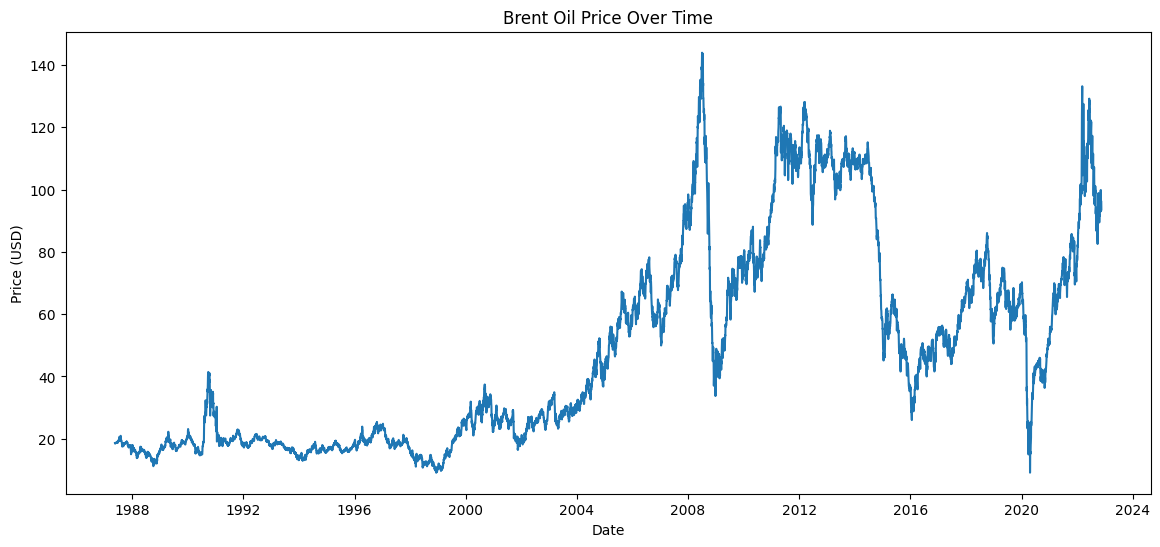

In [6]:
plt.figure(figsize=(14,6))
plt.plot(df["Date"], df["Price"])
plt.title("Brent Oil Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


In [7]:
result = adfuller(df["Price"])

print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287


In [8]:
df["log_price"] = np.log(df["Price"])
df["log_return"] = df["log_price"].diff()

df = df.dropna()


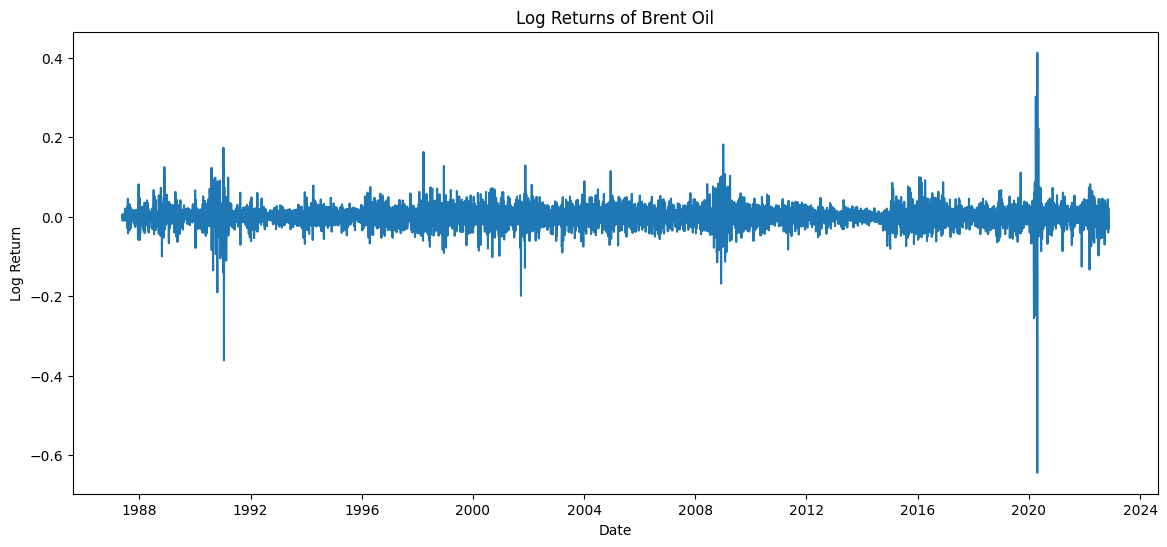

In [9]:
plt.figure(figsize=(14,6))
plt.plot(df["Date"], df["log_return"])
plt.title("Log Returns of Brent Oil")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.show()